![alternative text](../data/rosa-rafael-RjD01Is-KnI-unsplash.jpg)

# Introduction

In an era where music transcends geographical and genre boundaries, Taylor Swift's evolution from the storytelling verve of country music to the universal resonance of pop stands as a testament to her generational adaptability and artistic growth. This project is motivated by the desire to delve deeper into the essence of Taylor Swift's transformation, focusing on the morphological changes in her lyrics as a mirror reflecting this shift. By examining the intricacy and emotion conveyed through her choice of words, I embark on a journey to understand not just the artist's transition but also the evolving language of music itself. This exploration promises to shed light on the strategic choices that underscore Taylor Swift's success in capturing listeners worldwide, offering a unique perspective on the interplay between linguistic simplicity and emotional depth in reaching a global audience.

The hypothesis suggests that Swift's pivot to pop is marked not just by a stylistic shift but by a deliberate morphological simplification, fd avoring direct and emotionally chargelanguage that resonates on a global scale. This investigation seeks to explore the broader implications of such linguistic choices, illuminating how they reflect Swift's strategic navigation through the music industry's shifting sands, and how they mirror the universal appeal and accessibility that characterize her pop era.

# Methodology

## Data - Taylor Swift All Lyrics 

The dataset for this study comprises the complete collection of Taylor Swift's song lyrics, spanning her career from her debut album to "Midnight" released in 2022, all sourced from Kaggle.com. This compilation includes lyrics from all major original album releases, intentionally excluding variations and recent re-releases to maintain focus on the primary content reflective of each album's original period. This selection criteria ensure the analysis remains grounded in the authentic evolution of Swift's lyrical content, unaffected by potential lyrical modifications in later versions of albums. The dataset is meticulously curated to represent Swift's transition across musical genres, offering a comprehensive foundation for the morphological analysis.

## Linguistic Analysis

## Statistical Analysis

The statistical approach will involve quantitative measures to assess the morphological trends identified in the linguistic analysis. Descriptive statistics will summarize the overall complexity of word forms used across different albums. A time-series analysis will explore the evolution of these morphological features over time, correlating them with Swift's transition from country to pop. Correlational analyses will examine the relationship between the morphological characteristics of the lyrics and the respective album's genre classification. Tools such as Python's pandas for data manipulation and matplotlib or seaborn for visualization will support this analysis, providing a comprehensive view of Swift's lyrical evolution.

## NLP Analysis

### 1. Load, organize, and clean the data

In [13]:
import os
import pandas as pd

# Define the base path to the 'Albums' directory
base_path = '../data/Albums'

# Initialize an empty list to store the data
data = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.txt'):
            # Extract the album name and release year from the directory name
            album_info = root.split('/')[-1]
            release_year, album_name = album_info.split('_', 1)
            # Format album name to replace underscores with spaces
            album_name = album_name.replace('_', ' ')
            # Extract the song name from the file name, removing the file extension
            song = file.replace('.txt', '').replace('_', ' ').replace('PopVersion', '(Pop Version)').replace('LinerNotes', 'Liner Notes')
            # Read the lyrics from the file
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                lyrics = f.read()
            # Append the data to the list
            data.append({
                'release_year': release_year,
                'album_name': album_name,
                'song': song,
                'lyrics': lyrics
            })

# Create a pandas DataFrame
df = pd.DataFrame(data)

import re

# Remove unwanted text from the start of each cell in the 'lyrics' column
df['lyrics'] = df['lyrics'].apply(lambda x: re.sub(r'^\d+ Contributors.*?Lyrics', '', x))

# Remove text enclosed in brackets from each cell in the 'lyrics' column
df['lyrics'] = df['lyrics'].apply(lambda x: re.sub(r'\[.*?\]', '', x))

# Remove unwanted text from the end of each cell in the 'lyrics' column
df['lyrics'] = df['lyrics'].str.replace('\n', ' ')

# lowercase the lyrics
df['lyrics'] = df['lyrics'].str.lower()

# turn the release_year column into an integer
df['release_year'] = df['release_year'].astype(int)

# Display the first few rows of the DataFrame
df


,release_year,album_name,song,lyrics
0,2008,Fearless,Fifteen,you take a deep breath and you walk through t...
1,2008,Fearless,Change,"and it's a sad picture, the final blow hits y..."
2,2008,Fearless,TheBestDay,"i'm five years old, it's getting cold, i've g..."
3,2008,Fearless,HeyStephen,"mmm-mm, mm-mm mmm-mm, mm-mm mmm-mm, mm-mm, ye..."
4,2008,Fearless,TellMeWhy,"i took a chance, i took a shot and you might ..."
...,...,...,...,...
152,2010,SpeakNow,Enchanted,"there i was again tonight forcing laughter, f..."
153,2010,SpeakNow,Mean,"you, with your words like knives and swords a..."
154,2010,SpeakNow,Haunted,you and i walk a fragile line i have known it...
155,2010,SpeakNow,Innocent,i guess you really did it this time left your...


Count the total number of words in the lyrics column to make sure we have a large enough dataset for NLP analysis

In [14]:
# Download the 'punkt' package from the NLTK library if not installed
import nltk
nltk.download('punkt');

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stephenzhao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
from nltk.tokenize import word_tokenize
from scipy import sparse
# Tokenize the lyrics into words
tokenized_words = [word_tokenize(lyric) for lyric in df['lyrics']]

# Flatten the list of tokenized words
flat_words = [word for sublist in tokenized_words for word in sublist]

# Count the total number of words
total_words = len(flat_words)

# Print the total number of words
print("Total number of words in lyrics:", total_words)


Total number of words in lyrics: 68157


In [16]:
import spacy

nlp = spacy.load('en_core_web_sm')
sample_df = df.sample(1)
reading_data_docs = list(nlp.pipe(sample_df['lyrics']))

for tokenized_doc in reading_data_docs:
    for token in tokenized_doc:
        print(token.text, token.morph)


  
took Tense=Past|VerbForm=Fin
a Definite=Ind|PronType=Art
deep Degree=Pos
breath Number=Sing
in 
the Definite=Def|PronType=Art
mirror Number=Sing
he Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs
did Tense=Past|VerbForm=Fin
n't Polarity=Neg
like VerbForm=Inf
it Case=Acc|Gender=Neut|Number=Sing|Person=3|PronType=Prs
when 
i Case=Nom|Number=Sing|Person=1|PronType=Prs
wore Tense=Past|VerbForm=Fin
high Degree=Pos
heels Number=Plur
but ConjType=Cmp
i Case=Nom|Number=Sing|Person=1|PronType=Prs
do Mood=Ind|Tense=Pres|VerbForm=Fin
turn VerbForm=Inf
the Definite=Def|PronType=Art
lock Number=Sing
and ConjType=Cmp
put Tense=Past|VerbForm=Fin
my Number=Sing|Person=1|Poss=Yes|PronType=Prs
headphones Number=Plur
on 
he Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs
always 
said Tense=Past|VerbForm=Fin
he Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs
did Tense=Past|VerbForm=Fin
n't Polarity=Neg
get VerbForm=Inf
this Number=Sing|PronType=Dem
song Number=Sing
but ConjType=Cmp

In [17]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

df['token_num'] = df['lyrics'].apply(lambda x: len(word_tokenize(x)))

def calculate_ttr(lyrics):
    tokens = word_tokenize(lyrics.lower())  # Tokenize and lowercase the lyrics
    types = FreqDist(tokens)  # Calculate the frequency distribution
    return len(types) / len(tokens)  # Return TTR

df['lexical_diversity'] = df['lyrics'].apply(calculate_ttr)
df

,release_year,album_name,song,lyrics,token_num,lexical_diversity
0,2008,Fearless,Fifteen,you take a deep breath and you walk through t...,454,0.392070
1,2008,Fearless,Change,"and it's a sad picture, the final blow hits y...",315,0.403175
2,2008,Fearless,TheBestDay,"i'm five years old, it's getting cold, i've g...",385,0.457143
3,2008,Fearless,HeyStephen,"mmm-mm, mm-mm mmm-mm, mm-mm mmm-mm, mm-mm, ye...",481,0.295218
4,2008,Fearless,TellMeWhy,"i took a chance, i took a shot and you might ...",396,0.292929
...,...,...,...,...,...,...
152,2010,SpeakNow,Enchanted,"there i was again tonight forcing laughter, f...",452,0.325221
153,2010,SpeakNow,Mean,"you, with your words like knives and swords a...",496,0.288306
154,2010,SpeakNow,Haunted,you and i walk a fragile line i have known it...,387,0.284238
155,2010,SpeakNow,Innocent,i guess you really did it this time left your...,362,0.372928


In [23]:
lex_df = df.groupby(['release_year', 'album_name'])['lexical_diversity'].mean().reset_index()
lex_df

,release_year,album_name,lexical_diversity
0,2006,TaylorSwift,0.345614
1,2008,Fearless,0.340309
2,2010,SpeakNow,0.328040
3,2012,Red,0.315332
4,2014,1989,0.227402
5,2017,Reputation,0.280910
6,2019,Lover,0.301846
7,2020,Evermore,0.361829
8,2020,Folklore,0.395511
9,2022,Midnights,0.336664


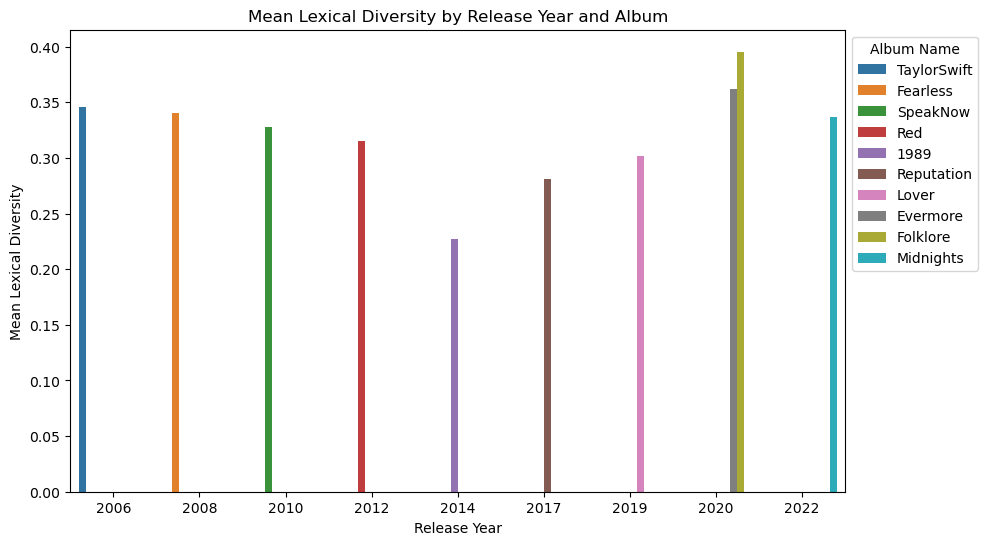

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='release_year', y='lexical_diversity', hue='album_name', data=lex_df)
plt.title('Mean Lexical Diversity by Release Year and Album')
plt.xlabel('Release Year')
plt.ylabel('Mean Lexical Diversity')
plt.legend(title='Album Name', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [26]:

import pandas as pd
from nltk.tokenize import word_tokenize

# Load the NRC Emotion Lexicon
nrc = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt',  names=["word", "emotion", "association"], sep='\t')
nrc = nrc[(nrc['emotion'] == 'positive') | (nrc['emotion'] == 'negative')]

# Assume df is your DataFrame and 'lyrics' is the column with the lyrics
df['tokenized_lyrics'] = df['lyrics'].apply(word_tokenize)

def calculate_emotion(row):
    positive_count = 0
    negative_count = 0
    for word in row['tokenized_lyrics']:
        if word in nrc['word'].values:
            emotion = nrc[nrc['word'] == word]['emotion'].values[0]
            if emotion == 'positive':
                positive_count += 1
            else:
                negative_count += 1
    return pd.Series([positive_count, negative_count])

df[['positive_count', 'negative_count']] = df.apply(calculate_emotion, axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'